# Plynomial_Regression

+ Uni and Bivariant Data analysis 
+ work only with nummerical values:
  - Handle outliers
  - Explore the distributions
  - impute missing values
  - Different multivariable linear models created with Statsmodels and Sklearn
  - Compare the results with polynominal model
+ Categorical Values:
  - One-Way Anova test
  - Traing and tes with new features
  - creating a pipline for handling all of preproccesing and traing and testing
  - Selecting features with Sequence Feature Selector technick
  - Train and Test the on new data!
  - Permutation feature importance for the last model

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
from scipy import stats 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

In [2]:
# load train part  
df=pd.read_csv('./Data/Hackathon/train.csv')

In [3]:
# split the dataframe to test and train part for realisitc results
df_train=df.sample(frac=0.85,random_state=110)
df_test=df.drop(df_train.index)
print(df_train.shape)
print(df_test.shape)
# from now is the train_df out main df for data preprocessing and model training 
df=df_train

(38250, 19)
(6750, 19)


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38250 entries, 41632 to 12354
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           38250 non-null  object 
 1   Airline             35262 non-null  object 
 2   Departure_City      37968 non-null  object 
 3   Arrival_City        38091 non-null  object 
 4   Distance            38169 non-null  float64
 5   Departure_Time      38250 non-null  object 
 6   Arrival_Time        38250 non-null  object 
 7   Duration            38250 non-null  float64
 8   Aircraft_Type       38209 non-null  object 
 9   Number_of_Stops     38250 non-null  int64  
 10  Day_of_Week         38065 non-null  object 
 11  Month_of_Travel     38024 non-null  object 
 12  Holiday_Season      30588 non-null  object 
 13  Demand              37975 non-null  object 
 14  Weather_Conditions  37985 non-null  object 
 15  Passenger_Count     38250 non-null  int64  
 16  Promo

In [4]:
Numerical_columns=df.select_dtypes(exclude='object').columns
Categorical_columns=df.select_dtypes(include='object').columns
print(Numerical_columns,len(Numerical_columns))
print(Categorical_columns,len(Categorical_columns))

Index(['Distance', 'Duration', 'Number_of_Stops', 'Passenger_Count',
       'Fuel_Price', 'Flight_Price'],
      dtype='object') 6
Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City',
       'Departure_Time', 'Arrival_Time', 'Aircraft_Type', 'Day_of_Week',
       'Month_of_Travel', 'Holiday_Season', 'Demand', 'Weather_Conditions',
       'Promotion_Type'],
      dtype='object') 13


## explore numerical columns

In [5]:
df[Numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38250 entries, 41632 to 12354
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Distance         38169 non-null  float64
 1   Duration         38250 non-null  float64
 2   Number_of_Stops  38250 non-null  int64  
 3   Passenger_Count  38250 non-null  int64  
 4   Fuel_Price       38182 non-null  float64
 5   Flight_Price     38250 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.0 MB


There are some null values in Distance and Fuel_Price columns !! 

In [6]:
df[Numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Distance,38169.0,5479.233802,2597.435155,1000.00,3226.0000,5474.00,7726.000,10000.00
Duration,38250.0,7.848709,3.298887,1.28,5.0200,7.83,10.650,14.45
Number_of_Stops,38250.0,0.666144,0.751142,0.00,0.0000,1.00,1.000,3.00
Passenger_Count,38250.0,174.868654,72.385786,50.00,112.0000,175.00,237.000,300.00
Fuel_Price,38182.0,0.850615,0.201498,0.50,0.6800,0.85,1.020,1.20
Flight_Price,38250.0,574.465463,160.289771,173.35,455.1425,565.82,679.535,1261.64


Points:
+ The Dependet Column is Flight Price
+ The values of column "Distance" overall are in a big range

## finding the outliers :
to define outliers we can:
- way one -> create boundries by looking along all values in each column (very generell )
- way two -> look for categorical value/values to create more specific boundries for outliers in every column</br>
A good Idea will be to define boundires with helf of "airline" column, as every airline has its specific </br>
route, prices,offers,...


<Axes: ylabel='Flight_Price'>

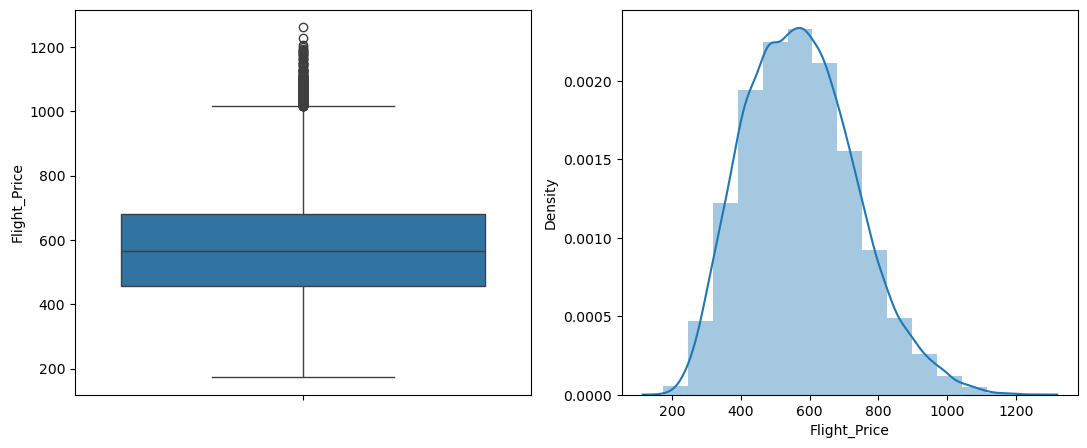

In [8]:
# distribution of Dependet Variable (Flight Price)
#DistPlot
f = plt.figure(figsize=(20,5))
boxplot= f.add_subplot(131)
dist = f.add_subplot(132)
sns.distplot(df.Flight_Price, bins = 15,ax=dist);
sns.boxplot(df.Flight_Price,ax=boxplot)


the distribution looks a little bit right skewed but ok ! 

In [9]:
#function for plotting violin plots
def plotting_box_violin_plots(df,cat,y):
    """
    x(str): category to group y by it 
    y(str): different values of columns 
    """
    fig,axes=plt.subplots(1,2,figsize=(20,5))
    fig.suptitle("Violin and box plots for variable : {}".format(y))
    
    sns.violinplot(ax=axes[0],x=cat,y=y,data=df)
    sns.boxplot(ax=axes[1],data=df[y])
    
    axes[0].set_title("Violin plot for variable : {}".format(y))
    axes[1].set_title("Box plot for variable : {}".format(y))

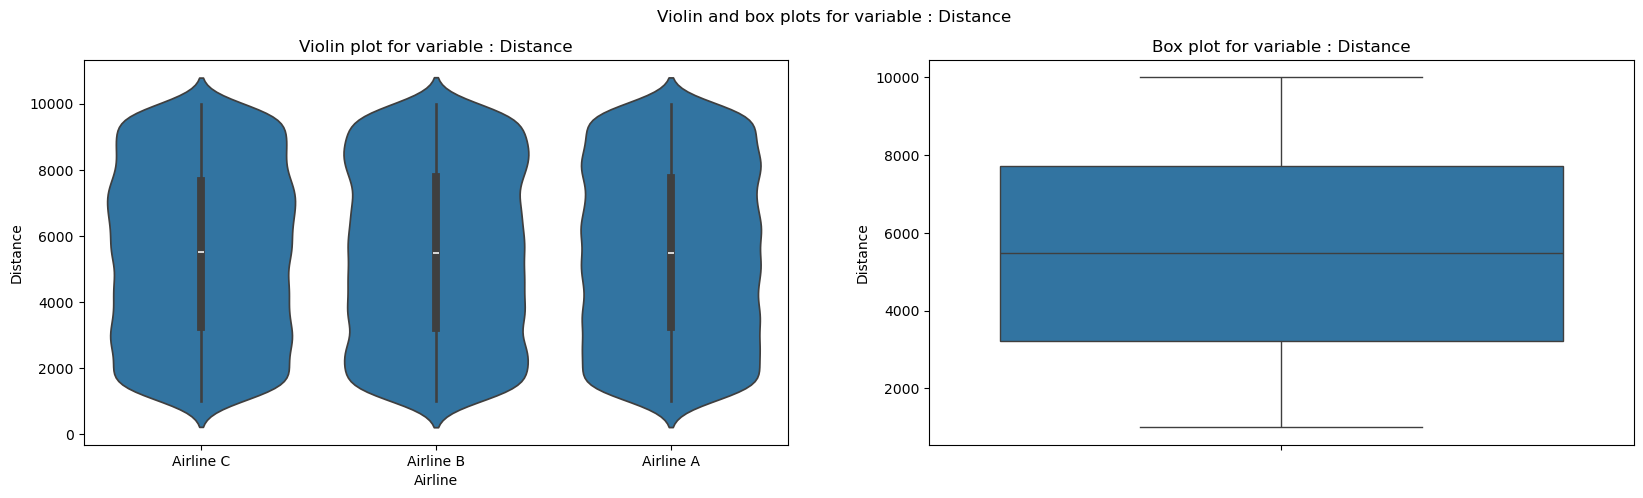

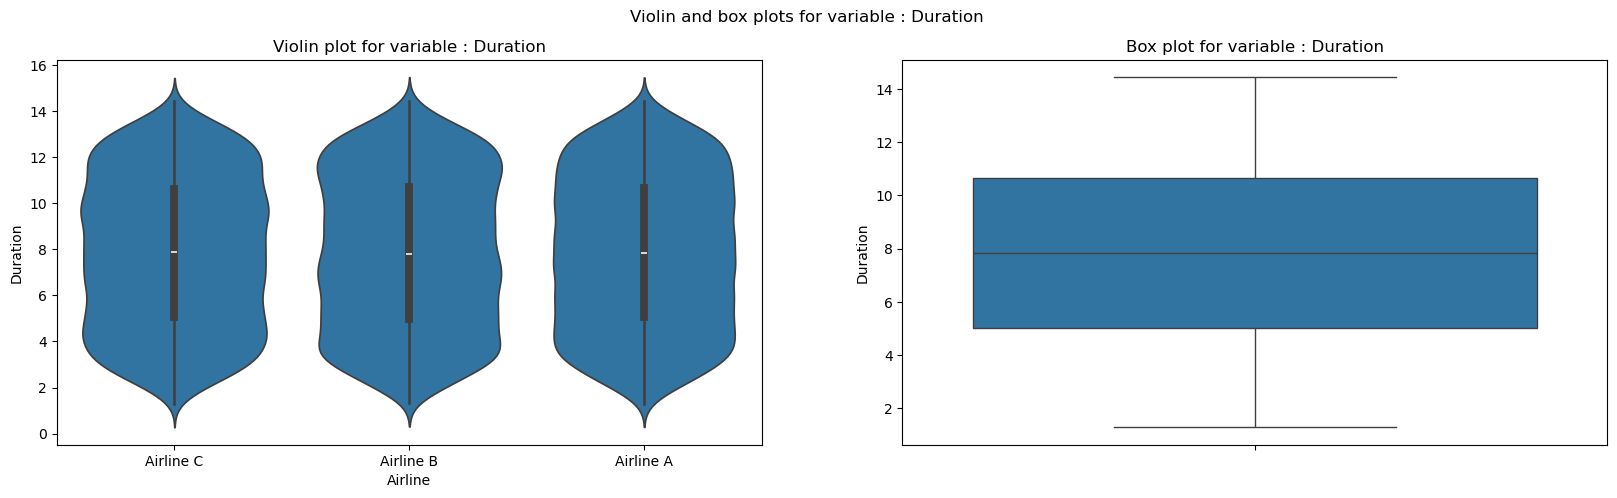

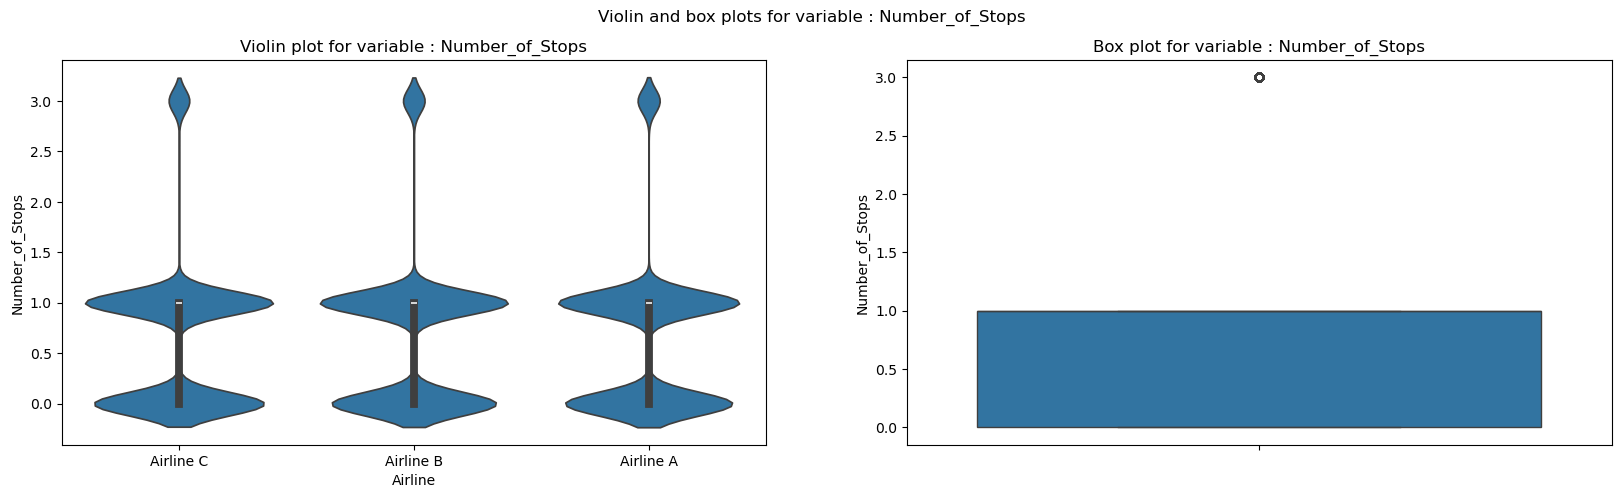

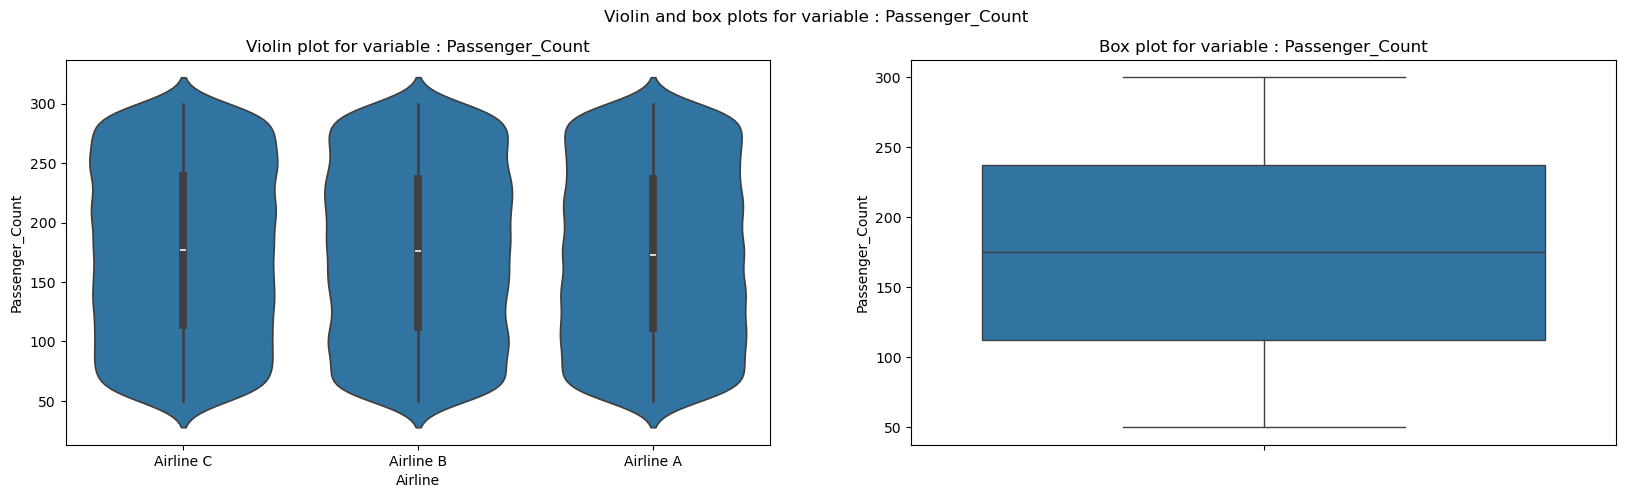

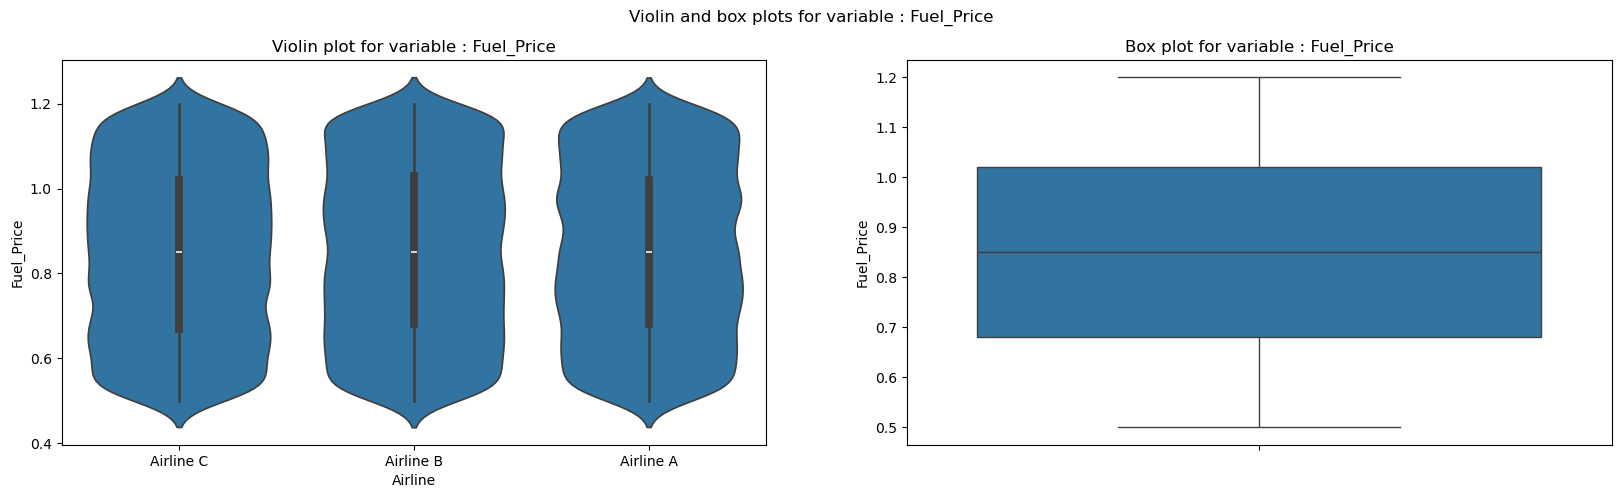

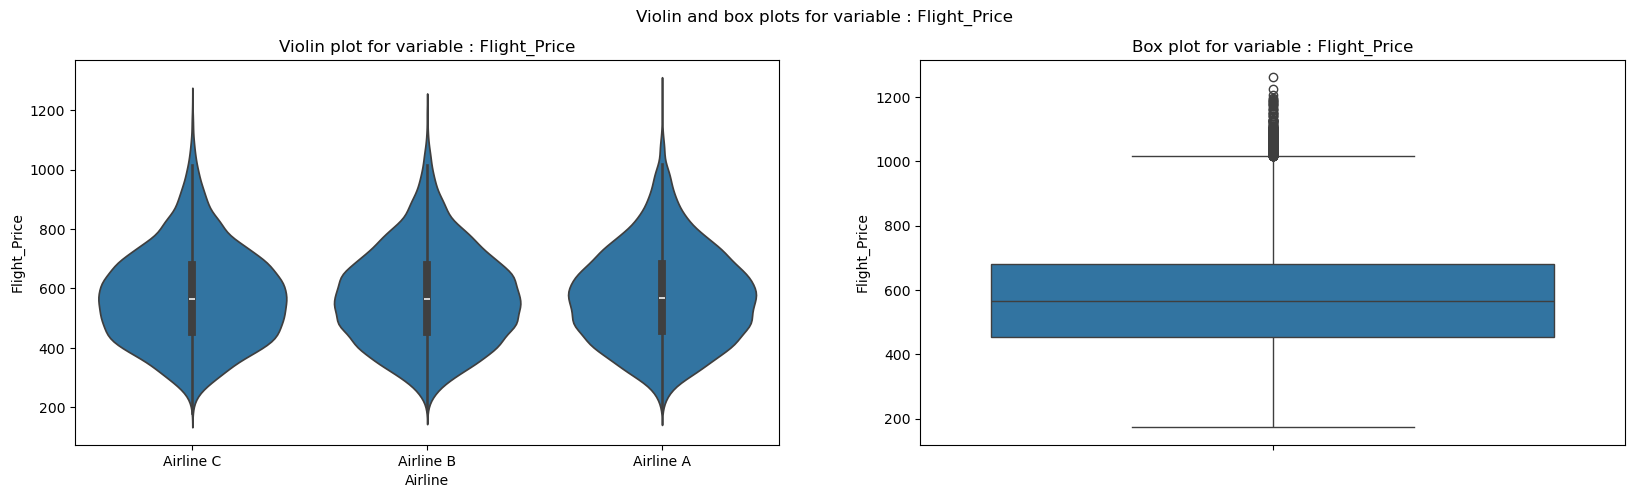

In [10]:
for col_name in Numerical_columns:
  plotting_box_violin_plots(df,"Airline",col_name)

As we see:
+ the distributions are definitly not normal along numric columns , only the "Flight_Price" has a normal form! </br>
+ "Flight_Price" has some outliers
+ "Number_of_Stops"-> sort of unbalaced population along all unique values (flys with 3 stops are rarly populated) </br>
+ The shapes of distributions in columns : Fule_Price, Passager_Count, Duration and distance, showed in violion plots, are simlilare.</br>
They show a sort of unform distribution, so a lineare model could not be good enough for them or we may use some categorical variable to bring some entrophy to all! 

#### Handeling Outliers of "Flight_Price"


In [11]:
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][(df[column]>Upper_End)| (df[column]<Lower_End) ]

  return outlier

#######################
for col in Numerical_columns : 
    outliers=find_outliers(df,col)
    if not outliers.empty:
        print("for %s outliers are: "%col)
    
        print(outliers)
        print()


######################
prices_outliers=find_outliers(df,"Flight_Price")
print("len of dataset: ",len(df))
print(f' the dropped percentage will be {len(prices_outliers)/len(df)*100} % of Dataset')

df_v1=df.drop(prices_outliers.index)
print("len of new dataset: ",len(df_v1))

for Number_of_Stops outliers are: 
16087    3
36910    3
21392    3
23222    3
24527    3
        ..
6467     3
27686    3
37328    3
25450    3
3385     3
Name: Number_of_Stops, Length: 2179, dtype: int64

for Flight_Price outliers are: 
38537    1034.56
27905    1033.98
21737    1186.55
44136    1044.46
36528    1070.73
          ...   
8916     1046.34
13804    1056.57
28388    1046.70
993      1018.91
39210    1031.31
Name: Flight_Price, Length: 250, dtype: float64

len of dataset:  38250
 the dropped percentage will be 0.6535947712418301 % of Dataset
len of new dataset:  38000


### Trying some other transformations on dependet variable

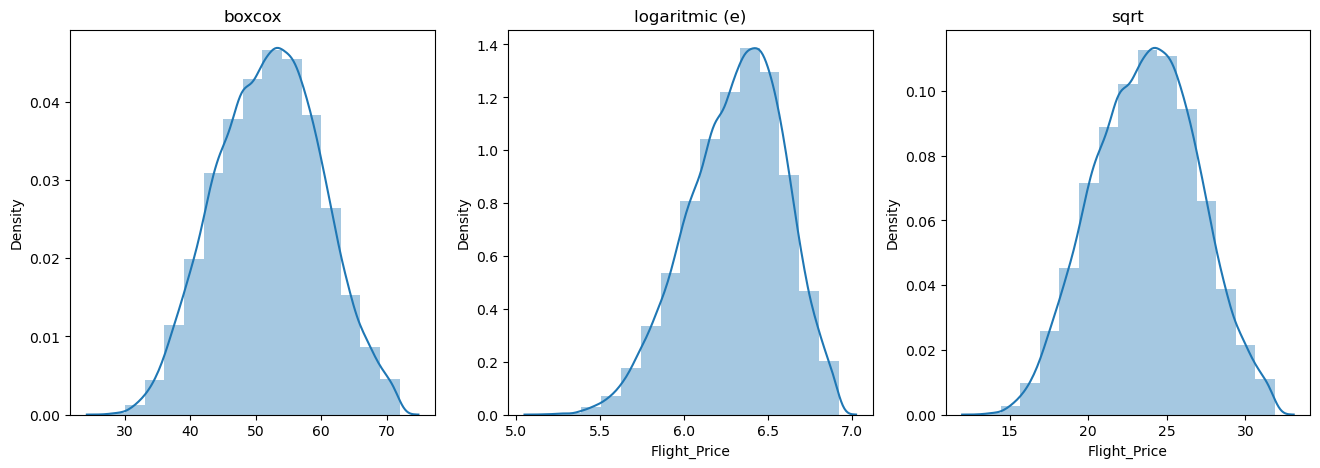

In [13]:
Y=df_v1.Flight_Price
log_trafo=np.log(Y)
sqrt_trafo=np.sqrt(Y)
# we need to save the lambda parameter , so reverse the transformation for our predictions
box_trafo,lambda_box=stats.boxcox(Y)

f = plt.figure(figsize=(16,5))

box= f.add_subplot(131)
box.set_title('boxcox')
sns.distplot(box_trafo, bins = 15,ax=box);

log = f.add_subplot(132)
log.set_title('logaritmic (e)')
sns.distplot(log_trafo, bins = 15,ax=log);

sqrt=f.add_subplot(133)
sqrt.set_title('sqrt')

sns.distplot(sqrt_trafo, bins = 15,ax=sqrt);

plt.show()

the SQRT Transformation looks better than orginal and others! 

In [14]:
df_v1['Flight_Price_Transformed']=sqrt_trafo
Numerical_columns=list(df.select_dtypes(exclude='object').columns)
Numerical_columns.extend(['Flight_Price_Transformed'])
Numerical_columns

['Distance',
 'Duration',
 'Number_of_Stops',
 'Passenger_Count',
 'Fuel_Price',
 'Flight_Price',
 'Flight_Price_Transformed']

### Impute value for Nans in "Distance" and "Fuel_Price"

In [15]:
df_v1[Numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38000 entries, 41632 to 12354
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Distance                  37919 non-null  float64
 1   Duration                  38000 non-null  float64
 2   Number_of_Stops           38000 non-null  int64  
 3   Passenger_Count           38000 non-null  int64  
 4   Fuel_Price                37934 non-null  float64
 5   Flight_Price              38000 non-null  float64
 6   Flight_Price_Transformed  38000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.3 MB


<Axes: title={'center': 'Nr of missing values across each column'}>

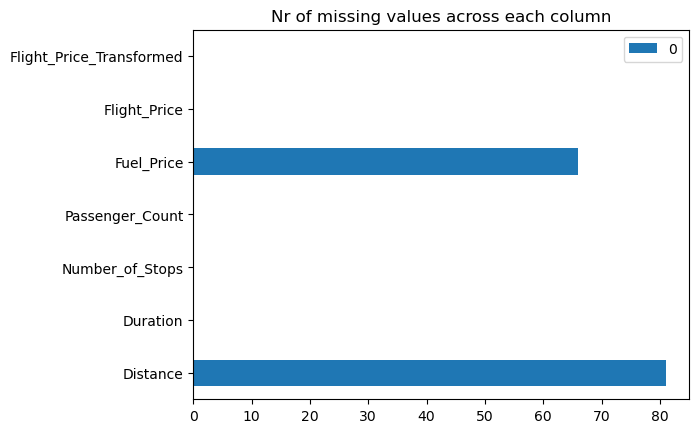

In [16]:
ncounts=pd.DataFrame([df_v1[Numerical_columns].isna().sum()]).T
ncounts=ncounts.rename(columns={1:'data_missing'})
ncounts.plot(kind='barh',title='Nr of missing values across each column')

In [7]:
# To choose the best imputer from skelearn , i will try different ones and train a simple linear regression model ! 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.pipeline import Pipeline
#
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#
from sklearn.impute import SimpleImputer
#
from sklearn.impute import KNNImputer

In [18]:
features=df_v1[Numerical_columns].columns.difference(['Flight_Price','Flight_Price_Transformed']).to_list()
features

['Distance', 'Duration', 'Fuel_Price', 'Number_of_Stops', 'Passenger_Count']

In [21]:
# using Skilearn Imputer
#model
model=LinearRegression()
# define different imputers
imputer_iter=IterativeImputer(max_iter=10)
imputer_simple=SimpleImputer(strategy='mean')
imputer_KNN=KNNImputer(n_neighbors=3)
# list of them to use in loop
imputer_list=[imputer_iter,imputer_simple,imputer_KNN]
# loop for evaluate differen imputers
X=df_v1[features]
y=df_v1['Flight_Price']
for imputer in imputer_list:
    pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
    cv=KFold(n_splits=5, random_state=693, shuffle=True)
    scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    #print(scores)
    print(f'Mean loss for imputer: {str(imputer)} is {-1*scores.mean():.3f} std {scores.std():.3f}')

Mean loss for imputer: IterativeImputer() is 77.318 std 0.467
Mean loss for imputer: SimpleImputer() is 77.387 std 0.453
Mean loss for imputer: KNNImputer(n_neighbors=3) is 77.338 std 0.477


Iterative imputer performs better than other ! 

In [22]:
##
df_v1=df.drop(prices_outliers.index)
print("len of new dataset: ",len(df_v1))
df_v1['Flight_Price_Transformed']=sqrt_trafo
Numerical_columns=list(df.select_dtypes(exclude='object').columns)
Numerical_columns.extend(['Flight_Price'])
Numerical_columns
###
features=df_v1[Numerical_columns].columns.difference(['Flight_Price','Flight_Price_Transformed']).to_list()
features
###

len of new dataset:  38000


['Distance', 'Duration', 'Fuel_Price', 'Number_of_Stops', 'Passenger_Count']

In [23]:
# now we use the same columns as above to impute the missing data in numerical columns
# add index value as a column for later merging imputed data and old data  
df_v1=df_v1.reset_index()
features.extend(['index'])
# impute and transfrom
df_v2=imputer_iter.fit_transform(df_v1[features])
# convert back from numpy array to pandas
df_v2=pd.DataFrame(df_v2,columns=features)

#delete index from feature list 
features.remove("index")
# drop not imputed columns and replace them with imputed ones 
df_v3=df_v1.drop(features,axis=1).merge(df_v2,how="inner",on=['index'])
df_v3.head(2)

,index,Flight_ID,Airline,Departure_City,Arrival_City,Departure_Time,Arrival_Time,Aircraft_Type,Day_of_Week,Month_of_Travel,...,Demand,Weather_Conditions,Promotion_Type,Flight_Price,Flight_Price_Transformed,Distance,Duration,Fuel_Price,Number_of_Stops,Passenger_Count
0,41632,F41633,Airline C,Port Paultown,Jonathonmouth,16:32,23:27,Boeing 777,Wednesday,July,...,Low,Rain,NaN,583.84,24.162781,3953.0,6.93,1.15,1.0,204.0
1,2636,F2637,Airline B,Port Kathleen,East Jesse,4:59,15:33,Airbus A380,Sunday,February,...,High,Cloudy,NaN,869.84,29.493050,7134.0,10.58,0.78,1.0,268.0


In [24]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     38000 non-null  int64  
 1   Flight_ID                 38000 non-null  object 
 2   Airline                   35031 non-null  object 
 3   Departure_City            37718 non-null  object 
 4   Arrival_City              37843 non-null  object 
 5   Departure_Time            38000 non-null  object 
 6   Arrival_Time              38000 non-null  object 
 7   Aircraft_Type             37959 non-null  object 
 8   Day_of_Week               37815 non-null  object 
 9   Month_of_Travel           37775 non-null  object 
 10  Holiday_Season            30394 non-null  object 
 11  Demand                    37727 non-null  object 
 12  Weather_Conditions        37735 non-null  object 
 13  Promotion_Type            25228 non-null  object 
 14  Flight

### **Univariate Analysis**
We know from volin and boxplots, that the distributions of numerical columns are uniform distributions (with except of "Flight_Price" and "Number_of_Stops")</br>
 a Uniform distribuation has everywhere the same probability, it means, that the mean and median are the same</br>
 and trying to normalize or standardization of dataset, doesn't change the form of it! </br>
 the mean and std of the distribuion are not really helpfull! 

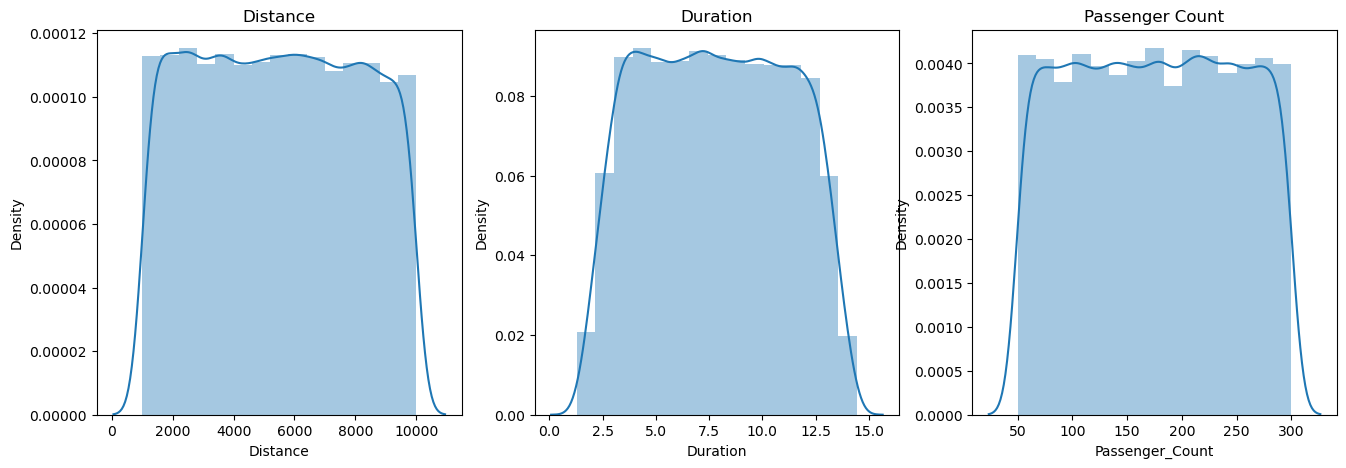

In [25]:
f = plt.figure(figsize=(16,5))

distance= f.add_subplot(131)
distance.set_title('Distance')
sns.distplot(df_v3.Distance, bins = 15,ax=distance);

duration = f.add_subplot(132)
duration.set_title('Duration')
sns.distplot(df_v3.Duration, bins = 15,ax=duration);

pas_count = f.add_subplot(133)
pas_count.set_title('Passenger Count')
sns.distplot(df_v3.Passenger_Count, bins = 15,ax=pas_count);


In [66]:
Numerical_columns

['Distance',
 'Duration',
 'Number_of_Stops',
 'Passenger_Count',
 'Fuel_Price',
 'Flight_Price',
 'Flight_Price_Transformed']

we can use this distribution to create new feature, which are more useful for prediction making 

### **Bivariate Analysis**

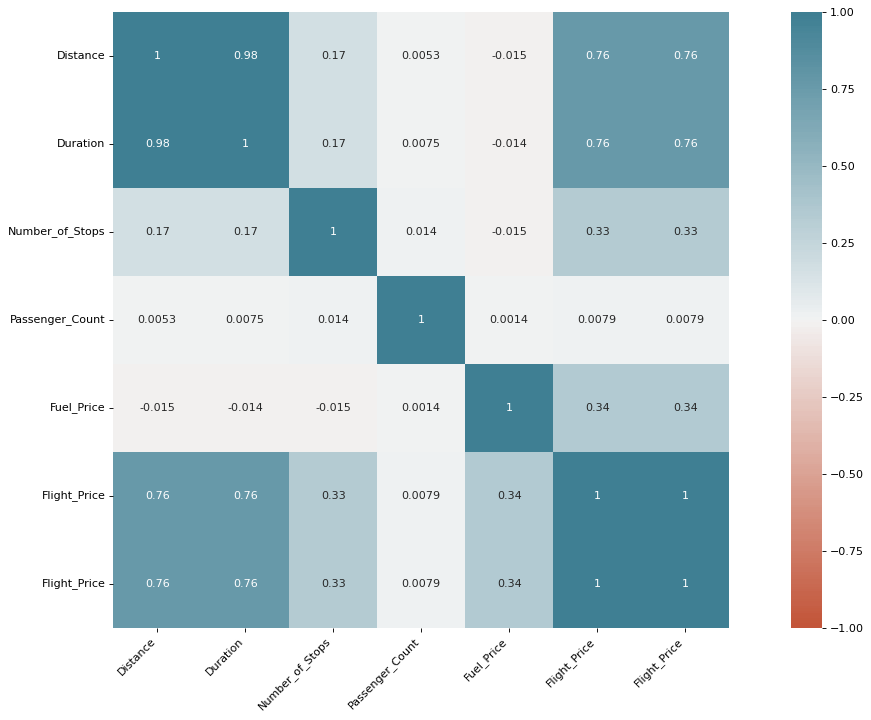

In [26]:
corr1=df_v3[Numerical_columns].corr()
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.heatmap(
    corr1,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); # use xticklabels to rotate la

to note:
- the columns "Passenger_Count" doesn't correlate much with "Flight_Price" , we can drop it ! 
- Distance and Duration are so much correlated, that we have to drope one of them (multicollinearity)! 

I will also implement [the Chatterjee correlation](https://www.sciencedirect.com/science/article/pii/S0169136822002621), which is capable of identifying linear and nonlinear relationships between variables and is robust against outliers ! 

In [27]:
# chatter je correlation 
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
    # Nr of elements
    N=df.shape[0]
    #create a copy 
    df_rank=df.copy()
    # rank of x dependet variable
    df_rank['rank']=df_rank[y].rank()

    # indipendent
    df_rank['rank_x']=df_rank[x].rank()

    #sort the data by rank of independet 
    df_rank=df_rank.sort_values(by='rank_x')
    # calc
    chatt_corr=1 - (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)
    return chatt_corr

In [28]:
for col_name in Numerical_columns:
    corr=chatterjee_corr(df_v3,col_name,'Flight_Price')
    print(f'for {col_name} and Flight_Price is the correlations: {corr:.3f}')

for Distance and Flight_Price is the correlations: 0.411
for Duration and Flight_Price is the correlations: 0.398
for Number_of_Stops and Flight_Price is the correlations: 0.061
for Passenger_Count and Flight_Price is the correlations: 0.002
for Fuel_Price and Flight_Price is the correlations: 0.064
for Flight_Price and Flight_Price is the correlations: 1.000
for Flight_Price and Flight_Price is the correlations: 1.000


In [29]:
df_v3.head(1)

,index,Flight_ID,Airline,Departure_City,Arrival_City,Departure_Time,Arrival_Time,Aircraft_Type,Day_of_Week,Month_of_Travel,...,Demand,Weather_Conditions,Promotion_Type,Flight_Price,Flight_Price_Transformed,Distance,Duration,Fuel_Price,Number_of_Stops,Passenger_Count
0,41632,F41633,Airline C,Port Paultown,Jonathonmouth,16:32,23:27,Boeing 777,Wednesday,July,...,Low,Rain,NaN,583.84,24.162781,3953.0,6.93,1.15,1.0,204.0


Okay, the results aren't particularly insightful, so let's proceed to create a baseline model without categorical variables!

## Models without Categorical values
Steps:
- Creating multivariable linear models in from statsmodels and Sklearn and compare them by RMSE!
- Create a polynominal model and compare it's results! 

### Multivariable Linear Regression 

In [8]:
from sklearn.metrics import mean_squared_error

In [38]:
# step 1 - Drop "Passenger_Count" and "Distance"
# I'm going with distance, because it's range is bigger than duration ! 
df_v4=df_v3.drop(columns=['Passenger_Count','Distance'])
X=df_v4[['Duration','Number_of_Stops','Fuel_Price']]
#y=df_v4[['Flight_Price_Transformed']]
y=df_v4[['Flight_Price']]

# split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
print(f'Shape of Dataset->  Train: {X_train.shape} and Test: {X_test.shape} dataset')

Shape of Dataset->  Train: (32300, 3) and Test: (5700, 3) dataset


### SM-Linear-Model 

In [39]:
X_const=sm.add_constant(X_train)
model_sm=sm.OLS(y_train,X_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Flight_Price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 3.187e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:34:52   Log-Likelihood:            -1.8668e+05
No. Observations:               32300   AIC:                         3.734e+05
Df Residuals:                   32296   BIC:                         3.734e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              36.9635      2.182     

In [40]:
# test on test dataset 
predictions= model_sm.predict(sm.add_constant(X_test))
loss_sm=np.sqrt(mean_squared_error(y_test,predictions))
print(round(loss_sm,3))

78.783


In [41]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
model_sk_l=LinearRegression()

# Run Cross-Validation
cv_scores = cross_validate( estimator = model_sk_l, X = X_train,y = y_train,
    cv=cv_strategy, 
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    verbose=1,
    n_jobs=-1,
)


# Cross Validation Scores
cv_scores_df = pd.DataFrame(cv_scores)
cv_scores_df

# Average Score
train_cv_score = cv_scores_df["train_score"].mean().round(2)
test_cv_score = cv_scores_df["test_score"].mean().round(2)

print("Train CV Score:", train_cv_score)
print("Test CV Score:", test_cv_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Train CV Score: -78.31
Test CV Score: -78.32


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [42]:
model_sk_l=LinearRegression()
model_sk_l.fit(X_train,y_train)
predictions= model_sk_l.predict(X_test)
loss_sk_l=np.sqrt(mean_squared_error(y_test,predictions))
print(round(loss_sk_l,3))

78.783


### As expectet, they are in the same range of accuracy 

### Polynominal Model 

In [14]:
# for calculating poly
from sklearn.preprocessing import PolynomialFeatures


In [44]:
poly=PolynomialFeatures(degree=3,include_bias=False)
Xpoly_features=poly.fit_transform(X_train)
model_sk_pl=LinearRegression()
model_sk_pl.fit(Xpoly_features,y_train)
# test
predictions= model_sk_pl.predict(poly.fit_transform(X_test))
loss_sk_pl=np.sqrt(mean_squared_error(y_test,predictions))
print("lose value: ",round(loss_sk_pl,3))

lose value:  78.404


#### The polynomial model is just a little bit better! 

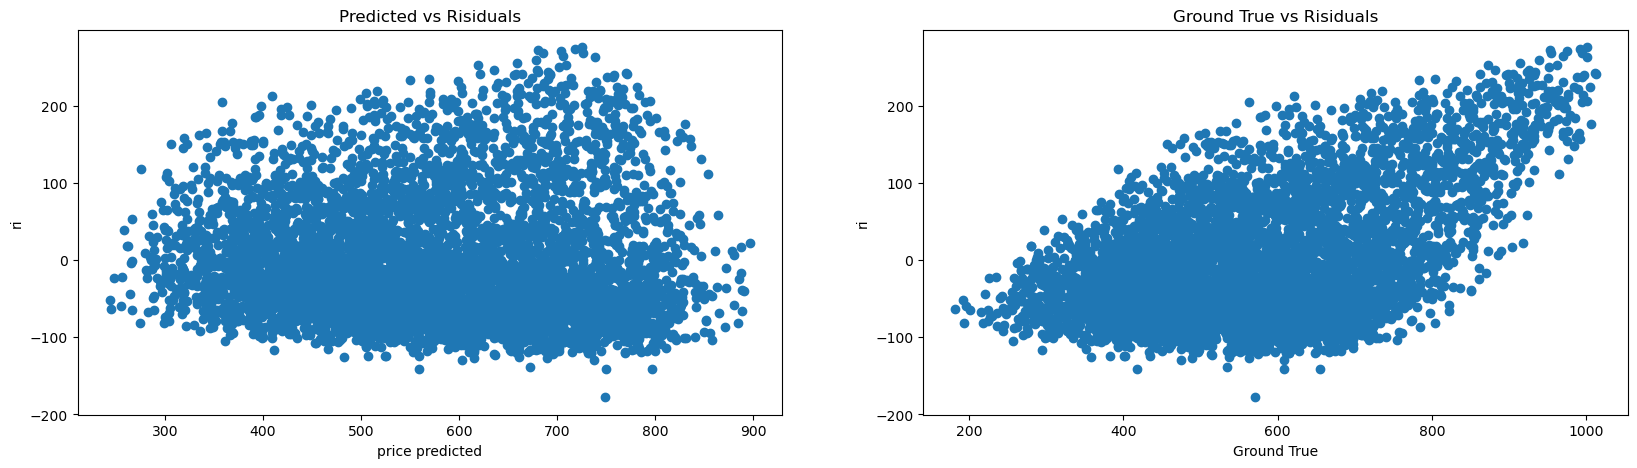

In [45]:
# risiduals vs predictions and 
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)
ax.scatter(predictions,(y_test-predictions))
plt.xlabel('price predicted')
plt.ylabel('ri')
plt.title('Predicted vs Risiduals')

# distribution of price in test-dataset
ax2 = f.add_subplot(122)
ax2.scatter(y_test,(y_test-predictions))
plt.xlabel('Ground True')
plt.ylabel('ri')
plt.title('Ground True vs Risiduals')

plt.show()



On the left side, the plot shows ,that the residuals are every where uniforly distributed! </br>
On the left we see a up trending distribution, it could mean, we have some sort of non linearity in out data (non-const-variance in dependet variable) </br>
the Polynominal model performers just a little bit better, lets see, what we get from catergrical ones !</br>

# Exporing categorical Columns

In [46]:
Categorical_columns=df_v3.select_dtypes(include='object').columns
print(Categorical_columns)

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City',
       'Departure_Time', 'Arrival_Time', 'Aircraft_Type', 'Day_of_Week',
       'Month_of_Travel', 'Holiday_Season', 'Demand', 'Weather_Conditions',
       'Promotion_Type'],
      dtype='object')


### chooice of variables: 
+ There are many columns in the dataset, each with numerous unique values. It's not practical to include all of them.
+ Some variables are essential due to their inherent nature, such as 'Airline', 'Month_of_Travel', 'Holiday_Season', 'Demand', and 'Promotion_Type',
  as they have a notable impact on flight prices.
+ To optimize our model and conserve resources, we should prioritize significant variables, giving preference to ordinal ones over nominals(dummy-encoding vs nominal- encoding).
+ Every additional independent variable adds to the computational cost and complexity of training the model.

In [47]:
df_v3.Airline.describe()

count         35031
unique            3
top       Airline A
freq          11746
Name: Airline, dtype: object

In [48]:
import scipy.stats as stats
# group the prices by Airlines 
airline_groups=df_v3.groupby("Airline").groups
airline_a= df_v1['Flight_Price_Transformed'][airline_groups['Airline A']]
airline_b= df_v1['Flight_Price_Transformed'][airline_groups['Airline B']]
airline_c= df_v1['Flight_Price_Transformed'][airline_groups['Airline C']]
# one-way anova
stats.f_oneway(airline_a, airline_b, airline_c)

F_onewayResult(statistic=0.997151473172889, pvalue=0.3689393217815664)

### A variable is significant and useful , if F-statistic > 0 and p < 0.05 is! 
 The results of Anova test shows (F-statistic > 0 and p < 0.05 ) , that there are differences between prices , based on the airline but, the signification is too low!  

In [49]:
#Demand
set(df_v3.Demand)

{'High', 'Low', 'Medium', nan}

In [50]:
demand_groups=df_v3.groupby("Demand").groups
demand_h= df_v3['Flight_Price_Transformed'][demand_groups['High']]
demand_l= df_v3['Flight_Price_Transformed'][demand_groups['Low']]
demand_m= df_v3['Flight_Price_Transformed'][demand_groups['Medium']]
# one-way anova
stats.f_oneway(demand_h, demand_l, demand_m)

F_onewayResult(statistic=3383.5518341623106, pvalue=0.0)

The results for "Demand" are more obvoius! 

In [51]:
def f_oneway(df):
    """
    function to test the signifant of categorical features with Anova Test
    df: Pandas DataFrame
    return:
        the name of the column and F-statical and P-value
    """
    cat_columns=df.select_dtypes(include='object').columns.to_list()
    for col_name in cat_columns:
        #col_name='Demand'
        # unique values of categorical columns
        u_values= df[col_name].unique().tolist()
        # delete nan from them
        if np.nan in u_values:
            u_values.remove(np.nan)
        #group them
        groups_=df_v1.groupby(col_name).groups
        
        len_unique=len(u_values)
        # list of groups
        list_g=[]
        if (len_unique > 5 or len_unique <= 1):
            print(f'length of {col_name} not supported!!')
            print()
            continue 
        for i in range(len(u_values)):
            tmp=df['Flight_Price_Transformed'][groups_[u_values[i]]]
            list_g.append(tmp.to_numpy())
        # we have to do it in this way !!
        if len_unique == 2:
            a,b=[*list_g]
            print(f'for columns {col_name}')
            print(stats.f_oneway(a, b))
        elif len_unique == 3:
            a,b,c=[*list_g]
            print(f'for columns {col_name}')
            print(stats.f_oneway(a, b,c))
        elif len_unique == 4:
            a,b,c,d=[*list_g]
            print(f'for columns {col_name}')
            print(stats.f_oneway(a, b,c,d))
        elif len_unique == 5:
            a,b,c,d,e=[*list_g]
            print(f'for columns {col_name}')
            print(stats.f_oneway(a,b,c,d,e))
        print()

In [52]:
f_oneway(df_v3)

length of Flight_ID not supported!!

for columns Airline
F_onewayResult(statistic=0.9971514731728892, pvalue=0.3689393217815664)

length of Departure_City not supported!!

length of Arrival_City not supported!!

length of Departure_Time not supported!!

length of Arrival_Time not supported!!

for columns Aircraft_Type
F_onewayResult(statistic=68.73628045827277, pvalue=4.465701284988533e-58)

length of Day_of_Week not supported!!

length of Month_of_Travel not supported!!

for columns Holiday_Season
F_onewayResult(statistic=105.9294582655641, pvalue=3.1882991824938634e-68)

for columns Demand
F_onewayResult(statistic=3383.5518341623115, pvalue=0.0)

for columns Weather_Conditions
F_onewayResult(statistic=945.9063315232014, pvalue=0.0)

for columns Promotion_Type
F_onewayResult(statistic=0.1442166069822821, pvalue=0.7041278009345413)



### As we see, there are some significant categorcal variables, which we will be using for our model
- need to encode : Aircraft_Type, Holiday_Season , Demand , Weather_Conditions , 

In [53]:
df_v1.Aircraft_Type.unique()

array(['Boeing 777', 'Airbus A380', 'Boeing 787', 'Boeing 737',
       'Airbus A320', nan], dtype=object)

### Problem with Nominal Categorical Values
- A big problem by encoding of nominal values like "Aircraft_Type" is that we</br>
need to encode them with onehot methode , which only by "Aircraft_Type" adds 5 new </br>
variables to our model(the curse of high dimensionality) and the dataset will look like a sparse matrix!
- A good way to encode Nominal Catergorical Variables is __Target Encoding__! 

In [12]:
# libs for encodings and pipline bulding
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import ColumnTransformer

In [55]:

enc_auto = TargetEncoder(target_type='continuous',smooth="auto")
#aircraft_encoded=enc_auto.fit_transform(df_v3.Aircraft_Type.to_numpy().reshape(-1,1),df_v3.Flight_Price_Transformed)
aircraft_encoded=enc_auto.fit_transform(df_v3.Aircraft_Type.to_numpy().reshape(-1,1),df_v3.Flight_Price)

# enpack the values 
for category, encoded_value in zip(*enc_auto.categories_,*enc_auto.encodings_):
    print(category ," : ",encoded_value)

Airbus A320  :  563.504584387112
Airbus A380  :  567.820146461105
Boeing 737  :  561.0813579334119
Boeing 777  :  599.1222092442488
Boeing 787  :  564.4479665558737
nan  :  545.9946988832398


### creating a simple pipline to hande all of the preprocessing steps! 

In [89]:
# now with new dataset and  polynomial model 
from sklearn.compose import ColumnTransformer
column_cat=['Aircraft_Type','Holiday_Season','Demand','Weather_Conditions']
column_num=['Duration','Fuel_Price','Number_of_Stops']
features=column_cat + column_num
data_set=df_v3[features]
#y=df_v3['Flight_Price_Transformed']
y_encoded=df_v3['Flight_Price']
t = [('cat', TargetEncoder(target_type='continuous',smooth="auto"), column_cat)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')
dataset_encoded=col_transform.fit_transform(data_set,y)
dataset_encoded=pd.DataFrame(dataset_encoded,columns=features)
dataset_encoded.head()

,Aircraft_Type,Holiday_Season,Demand,Weather_Conditions,Duration,Fuel_Price,Number_of_Stops
0,598.691487,568.539790,527.600511,529.200175,6.93,1.15,1.0
1,567.439723,594.298912,694.909350,611.189281,10.58,0.78,1.0
2,567.509021,570.769448,528.534289,527.422121,11.19,0.55,1.0
3,563.741906,571.026390,527.960794,527.908918,4.65,1.03,0.0
4,563.410775,571.042975,694.909350,611.189281,12.35,0.82,1.0


In [91]:
# train and test the model 
X_train,X_test,y_train,y_test=train_test_split(dataset_encoded,y_encoded,test_size=0.15)
print(f'Shape of Dataset->  Train: {X_train.shape} and Test: {X_test.shape} dataset')

poly=PolynomialFeatures(degree=2,include_bias=False)
Xpoly_features=poly.fit_transform(X_train)
model_sk_pl=LinearRegression()
model_sk_pl.fit(Xpoly_features,y_train)
# test
predictions= model_sk_pl.predict(poly.fit_transform(X_test))
#loss_sk_pl=np.sqrt(mean_squared_error(y_test**2,predictions**2))
loss_sk_pl=np.sqrt(mean_squared_error(y_test,predictions))

print("Model rmse-loss: ",round(loss_sk_pl,3))

Shape of Dataset->  Train: (32300, 7) and Test: (5700, 7) dataset
Model loss:  38.012


so , we see a big improvement in loss (from 78 to 38)!!

### the last part of the plan is to test the model on the part of dataset, which we splited direktly after loading the csv-file: 
- explore the unseen data
- create a pipline for prerpossesing the data
- Train a model on train part
- test the model with test part

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6750 entries, 3 to 44996
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           6750 non-null   object 
 1   Airline             6165 non-null   object 
 2   Departure_City      6692 non-null   object 
 3   Arrival_City        6723 non-null   object 
 4   Distance            6740 non-null   float64
 5   Departure_Time      6750 non-null   object 
 6   Arrival_Time        6750 non-null   object 
 7   Duration            6750 non-null   float64
 8   Aircraft_Type       6748 non-null   object 
 9   Number_of_Stops     6750 non-null   int64  
 10  Day_of_Week         6710 non-null   object 
 11  Month_of_Travel     6709 non-null   object 
 12  Holiday_Season      5392 non-null   object 
 13  Demand              6708 non-null   object 
 14  Weather_Conditions  6713 non-null   object 
 15  Passenger_Count     6750 non-null   int64  
 16  Promotion_

## Train and test the model with different dataset! 

In [10]:
# load train part  
df=pd.read_csv('./Data/Hackathon/train.csv')
df_train=df.sample(frac=0.85,random_state=110)
df_test=df.drop(df_train.index)
print("Size of train: ",df_train.shape)
print("Size of test: ",df_test.shape)
# selecting the right columns
features=['Aircraft_Type','Holiday_Season','Demand','Weather_Conditions',\
               'Duration','Fuel_Price','Number_of_Stops']
target=['Flight_Price']

Size of train:  (38250, 19)
Size of test:  (6750, 19)


In [15]:
# selecting numerical and categorical features
numerical_ix = df_train[features].select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df_train[features].select_dtypes(include=['object', 'bool']).columns

# creating the pipline for training and testing
numeric_transformer = Pipeline(
    steps=[
        ("imputer", IterativeImputer(max_iter=10)),])

categorical_transformer = Pipeline(
    steps=[
        ("encoder",TargetEncoder(target_type='continuous',smooth="auto")),])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_ix),
        ("cat", categorical_transformer, categorical_ix),],remainder="passthrough")
# poly model
model = Pipeline(steps=[
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("regressor",LinearRegression())])

# connect all to gether
clf = Pipeline(steps=[("preprocessor", preprocessor),("poly-regressor",model),])

# train
clf.fit(df_train[features], df_train[target])
#test
predictions=clf.predict(df_test[features])
loss=np.sqrt(mean_squared_error(df_test[target],predictions))

#print("Model loss: ",round(loss_sk_pl,3))
print("model rmse-loss: %.3f" %loss) 

model rmse-loss: 37.967


### Experimental part
#### Sequential Backword Selection with mentioning __tol__ value
tol: "If the score is not incremented by at least __tol__ between two consecutive feature additions or removals, stop adding or removing."
let's use all columns and encode them and drop them by a feature selector of sklearn
[Link to a good article](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector

numerical_ix = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
categorical_ix = list(df_train.select_dtypes(include=['object', 'bool']).columns)
numerical_ix.remove('Flight_Price')
categorical_ix.remove('Flight_ID')
target=['Flight_Price']
features=numerical_ix + categorical_ix

# creating the pipline for training and testing
numeric_transformer = Pipeline(
    steps=[
        ("imputer", IterativeImputer(max_iter=10)),])

categorical_transformer = Pipeline(
    steps=[
        ("encoder",TargetEncoder(target_type='continuous',smooth="auto")),])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_ix),
        ("cat", categorical_transformer, categorical_ix),],remainder="passthrough")
# poly model
model = Pipeline(steps=[
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("regressor",LinearRegression())])

# connect all to gether
#clf = Pipeline(steps=[("preprocessor", preprocessor),("poly-regressor",model),])

feature_names = np.array(df_train[features].columns)

# we will use rmse , so the tol would be the change in the rmse value 
for tol in [-4e+1,-2e+1,-1e+1,-0.5e+1, 0.1e+1]:

    #start = time()
    feature_selector = SequentialFeatureSelector(
        model,
        n_features_to_select="auto",
        direction="backward",
        scoring="neg_mean_squared_error",
        tol=tol,
        n_jobs=-1,
    )
    clf = Pipeline(steps=[("preprocessor", preprocessor),("feature_selector",feature_selector),("model",model)])
    clf.fit(df_train[features], df_train[target])
    print(f"\ntol: {tol}")
    #print(f"Features selected: {feature_names[model[1].get_support()]}")
    #print(clf.get_support())
    predictions=clf.predict(df_train[features])
    loss=np.sqrt(mean_squared_error(df_train[target],predictions))
    print("used features: ",feature_names[clf[1].get_support()])
    print("model rmse-loss: %.3f" %loss) 


tol: -40.0
used features:  ['Distance' 'Duration' 'Number_of_Stops' 'Fuel_Price' 'Day_of_Week'
 'Month_of_Travel' 'Demand']
model rmse-loss: 12.983

tol: -20.0
used features:  ['Distance' 'Duration' 'Number_of_Stops' 'Fuel_Price' 'Day_of_Week'
 'Month_of_Travel' 'Demand']
model rmse-loss: 12.983

tol: -10.0
used features:  ['Distance' 'Duration' 'Number_of_Stops' 'Fuel_Price' 'Day_of_Week'
 'Month_of_Travel' 'Demand']
model rmse-loss: 12.982

tol: -5.0
used features:  ['Distance' 'Duration' 'Number_of_Stops' 'Fuel_Price' 'Day_of_Week'
 'Month_of_Travel' 'Demand' 'Weather_Conditions']
model rmse-loss: 12.740

tol: 1.0
used features:  ['Distance' 'Duration' 'Number_of_Stops' 'Fuel_Price' 'Airline'
 'Departure_City' 'Arrival_City' 'Departure_Time' 'Arrival_Time'
 'Aircraft_Type' 'Day_of_Week' 'Month_of_Travel' 'Holiday_Season' 'Demand'
 'Weather_Conditions' 'Promotion_Type']
model rmse-loss: 12.733


In [ ]:
features=['Aircraft_Type','Holiday_Season','Demand','Weather_Conditions',\
               'Duration','Fuel_Price','Number_of_Stops']

# As we see , we can imporve the results of the model , simply by :
- dropping: Aircraft_Type , Holiday_Season 
- adding: Moth_of_Travel , Day_of_Week and Duration</br>
so instat of 7 features , we hav now 8 ! 

In [50]:
# tol: -5.0
new_features=['Distance','Duration', 'Number_of_Stops' ,'Fuel_Price', 'Day_of_Week',
 'Month_of_Travel' ,'Demand' ,'Weather_Conditions']

target=['Flight_Price']

# selecting numerical and categorical features
numerical_ix = df_train[new_features].select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df_train[new_features].select_dtypes(include=['object', 'bool']).columns

# creating the pipline for training and testing
numeric_transformer = Pipeline(
    steps=[
        ("imputer", IterativeImputer(max_iter=10)),])

categorical_transformer = Pipeline(
    steps=[
        ("encoder",TargetEncoder(target_type='continuous',smooth="auto")),])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_ix),
        ("cat", categorical_transformer, categorical_ix),],remainder="passthrough")
# poly model
model = Pipeline(steps=[
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("regressor",LinearRegression())])

# connect all to gether
clf = Pipeline(steps=[("preprocessor", preprocessor),("poly-regressor",model),])

# train
clf.fit(df_train[new_features], df_train[target])
#test
predictions=clf.predict(df_test[new_features])
loss=np.sqrt(mean_squared_error(df_test[target],predictions))

#print("Model loss: ",round(loss_sk_pl,3))
print("model rmse-loss: %.3f" %loss) 

model rmse-loss: 12.634


The new result of the model is really good, but we have to be aware of posible numeric instablity cases , </br>
because of high correlation between Duration and Distance ! 

## Check the importance of the columns for this model ! 

In [58]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error']
r_multi = permutation_importance(
    clf, df_test[new_features], df_test[target], n_repeats=30, random_state=0, scoring=scoring)
feature_names = np.array(df_train[new_features].columns)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        # if the importance are signifacant or it's out of meand/65 % of distribution 
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {feature_names[i] :<8}"
                  f"{r.importances_mean[i] :.3f}"
                  f" +/- {r.importances_std[i] :.3f}")

r2
    Distance0.411 +/- 0.005
    Demand  0.279 +/- 0.004
    Fuel_Price0.251 +/- 0.003
    Duration0.162 +/- 0.002
    Number_of_Stops0.094 +/- 0.001
    Month_of_Travel0.058 +/- 0.001
    Weather_Conditions0.050 +/- 0.001
    Day_of_Week0.031 +/- 0.000
neg_mean_absolute_percentage_error
    Distance0.140 +/- 0.001
    Fuel_Price0.105 +/- 0.001
    Duration0.083 +/- 0.001
    Demand  0.074 +/- 0.001
    Number_of_Stops0.049 +/- 0.001
    Month_of_Travel0.042 +/- 0.001
    Day_of_Week0.028 +/- 0.000
    Weather_Conditions0.020 +/- 0.000


Duration, Deman,Fuel_Price, Distance are the top 4 ! 